In [1]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
ConversationsFromUniversities= pd.concat(map(pd.read_feather, glob.glob('../DataStore/ConversationsFromUniversities/*.ftr')),ignore_index=True)


ConversationsMentioningUniversities= pd.concat(map(pd.read_feather, glob.glob('../DataStore/ConversationsMentioningUniversities/*.ftr')),ignore_index=True)



ConversationsFromUniversities['created_at']=pd.to_datetime(ConversationsFromUniversities['created_at'])
ConversationsFromUniversities['collection_timestamp']=pd.to_datetime(ConversationsFromUniversities['created_at']).dt.strftime('%Y-%m-%d')


ConversationsMentioningUniversities['created_at']=pd.to_datetime(ConversationsMentioningUniversities['created_at'])
ConversationsMentioningUniversities['collection_timestamp']=pd.to_datetime(ConversationsMentioningUniversities['created_at']).dt.strftime('%Y-%m-%d')

## Campaign Insights
### Monitor campaign KPIs across your top competitors and identify top content

### CI1-3: Top Hashtags From Universities
#### Twitter campaigns will monitored in the future,for the time being we track #hashtags

In [4]:
## We extract hashtags

ConversationsFromUniversities['hashtags']=ConversationsFromUniversities['text'].str.findall(r'#.*?(?=\s|$)')
# we filter out conversations having hashtags
ConversationsFromUniversitiesFiltered=ConversationsFromUniversities[ConversationsFromUniversities['hashtags'].str.len() != 0]

## We explode hashtags
ConversationsFromUniversitiesFilteredExploded=ConversationsFromUniversitiesFiltered[['author.name','public_metrics.retweet_count','public_metrics.like_count','public_metrics.reply_count','hashtags']].explode('hashtags')



In [5]:
TopNHashTags=ConversationsFromUniversitiesFilteredExploded.sort_values(['public_metrics.retweet_count'],ascending=False, axis=0).groupby('author.name').head(5)

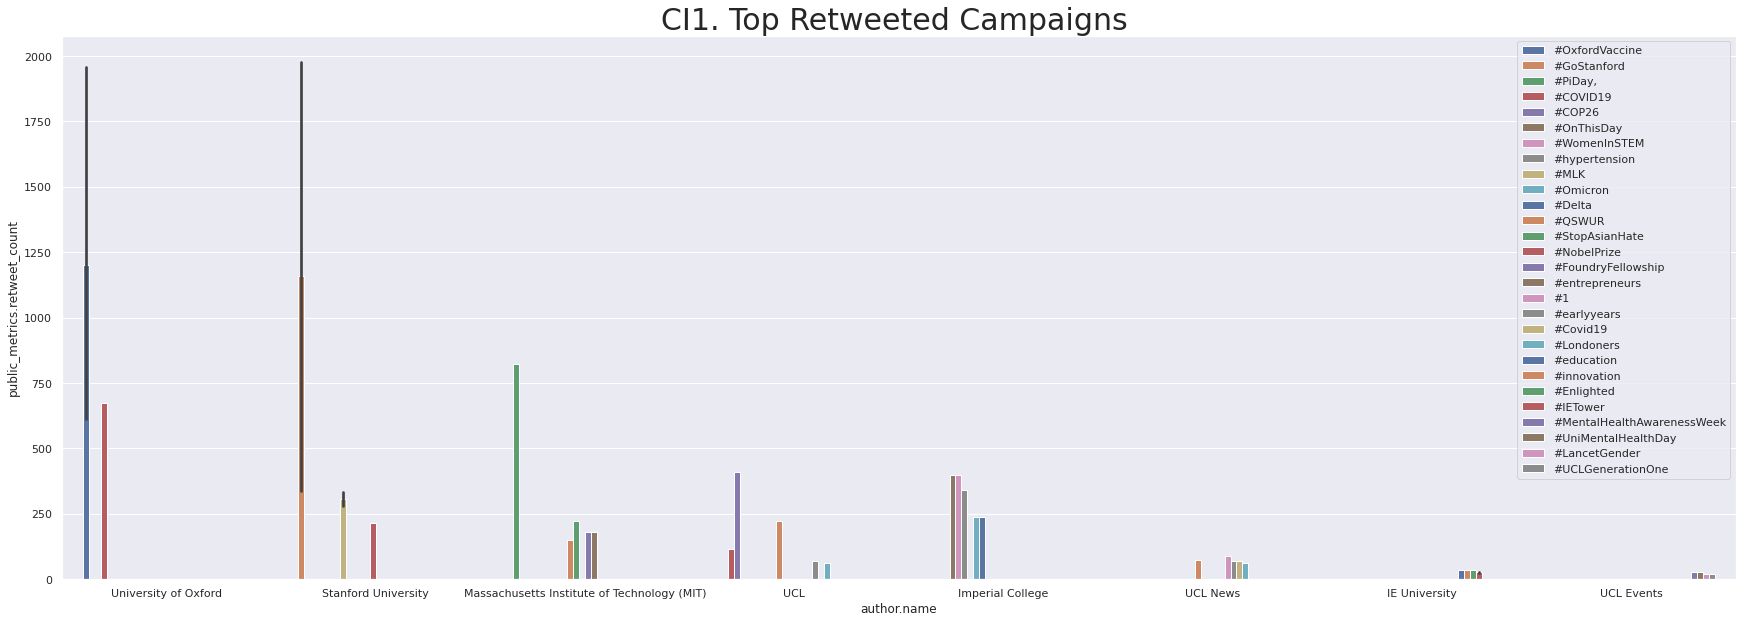

In [6]:
sns.color_palette("Paired")
sns.set(rc={'figure.figsize':(30,10)})
ax=sns.barplot(x="author.name", y="public_metrics.retweet_count", hue="hashtags", data=TopNHashTags,palette="deep").set_title("CI1. Top Retweeted Campaigns ",fontsize=30);
plt.legend(loc='upper right')

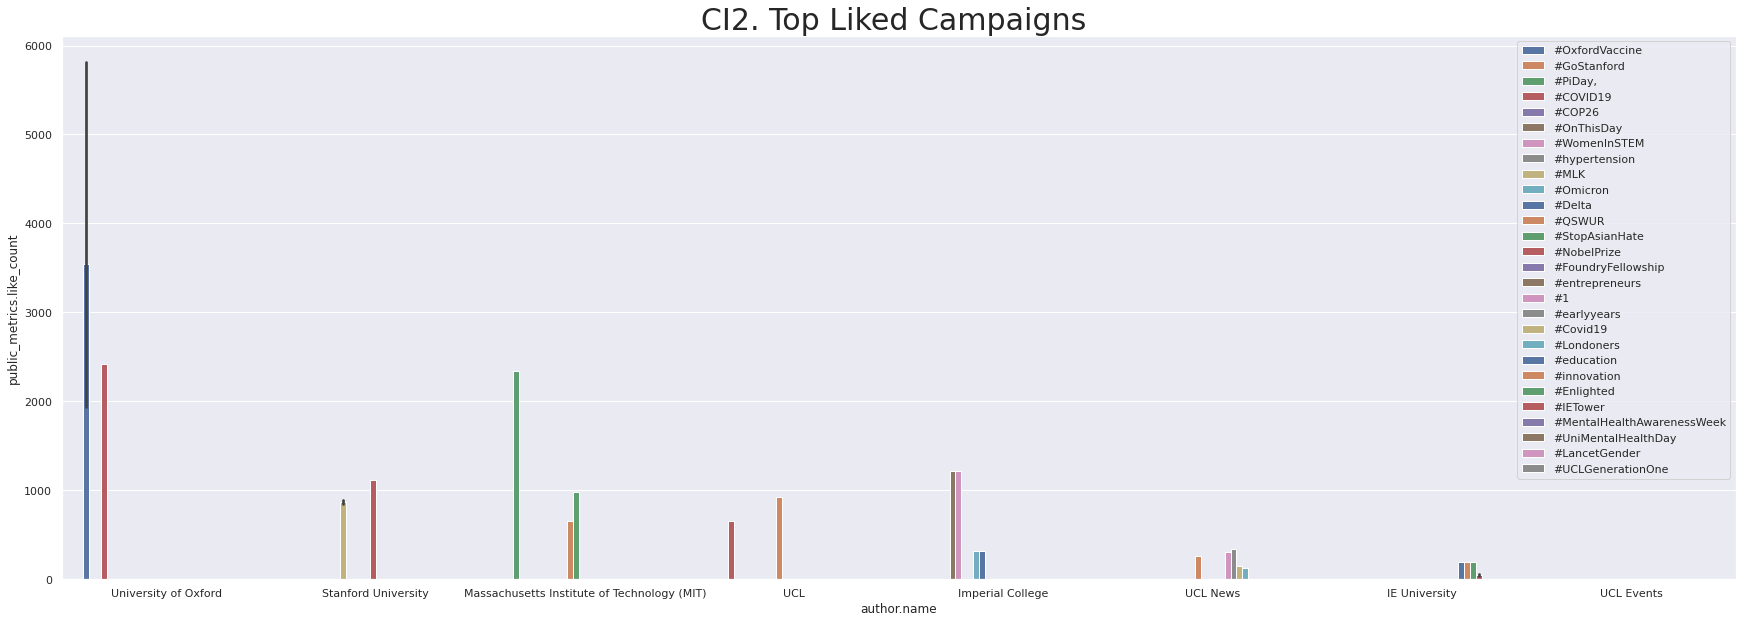

In [7]:
sns.color_palette("Paired")
sns.set(rc={'figure.figsize':(30,10)})
ax=sns.barplot(x="author.name", y="public_metrics.like_count", hue="hashtags", data=TopNHashTags,palette="deep").set_title("CI2. Top Liked Campaigns ",fontsize=30);
plt.legend(loc='upper right')

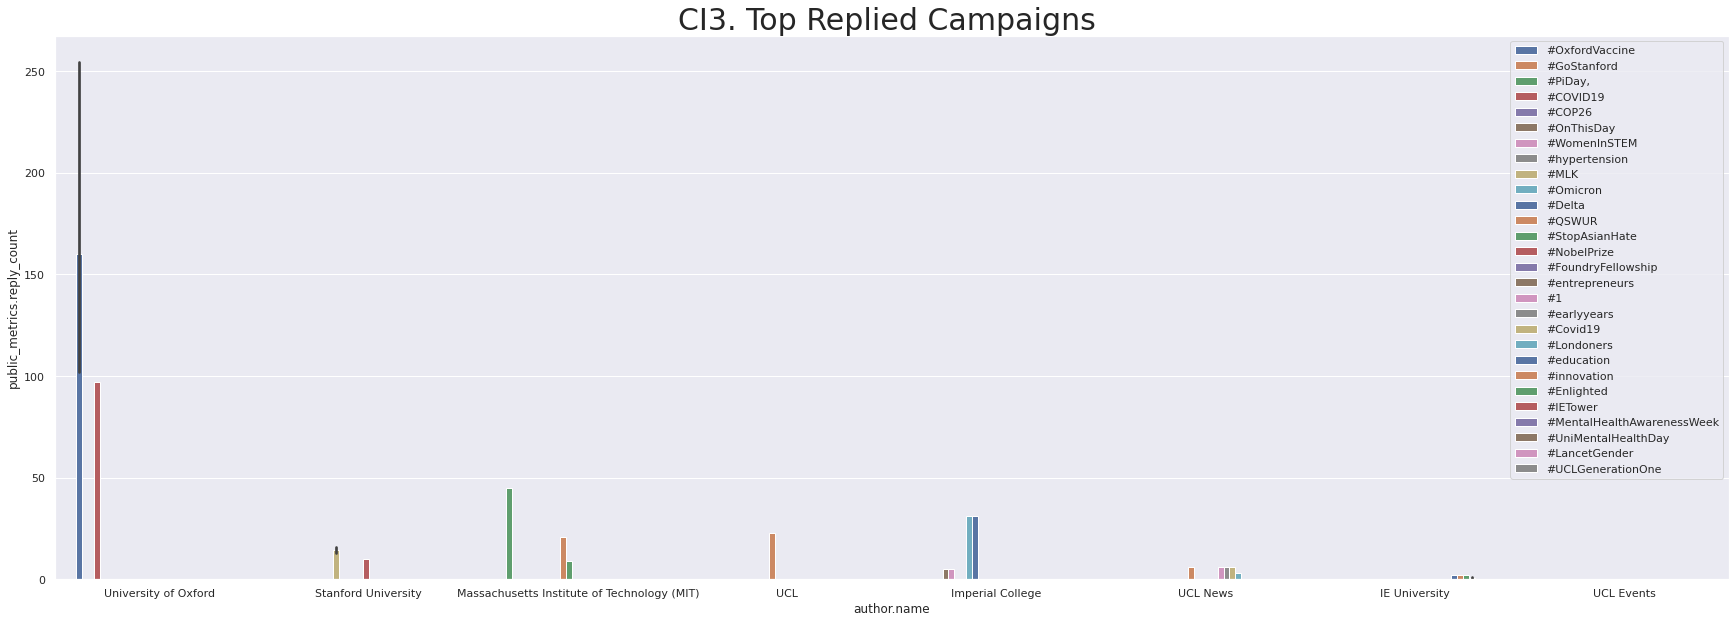

In [8]:
sns.color_palette("Paired")
sns.set(rc={'figure.figsize':(30,10)})
ax=sns.barplot(x="author.name", y="public_metrics.reply_count", hue="hashtags", data=TopNHashTags,palette="deep").set_title("CI3. Top Replied Campaigns ",fontsize=30);
plt.legend(loc='upper right')

### CI4-6: Top Hashtags From IEUniversity
#### Twitter campaigns will monitored in the future,for the time being we track #hashtags from IEUniversity

In [9]:
IEUniversity='IE University'

In [10]:
TopNHashTagsIEUniversity=ConversationsFromUniversitiesFilteredExploded[ConversationsFromUniversitiesFilteredExploded['author.name']==IEUniversity]

In [11]:
CI4Visualization=TopNHashTagsIEUniversity[['public_metrics.retweet_count','hashtags']].sort_values(by='public_metrics.retweet_count',ascending=False).head(20)

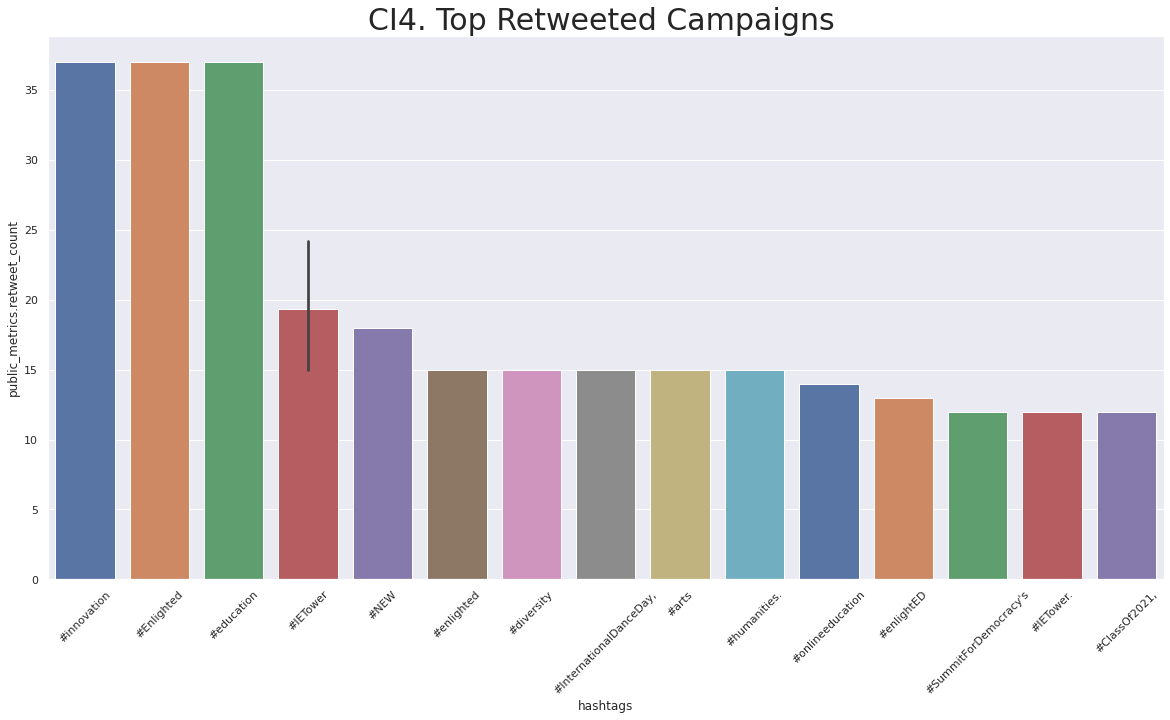

In [12]:
sns.color_palette("Paired")
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.barplot(x="hashtags", y="public_metrics.retweet_count", data=CI4Visualization,palette="deep").set_title("CI4. Top Retweeted Campaigns ",fontsize=30);
plt.xticks(rotation=45);

In [13]:
CI5Visualization=TopNHashTagsIEUniversity[['public_metrics.like_count','hashtags']].sort_values(by='public_metrics.like_count',ascending=False).head(20)

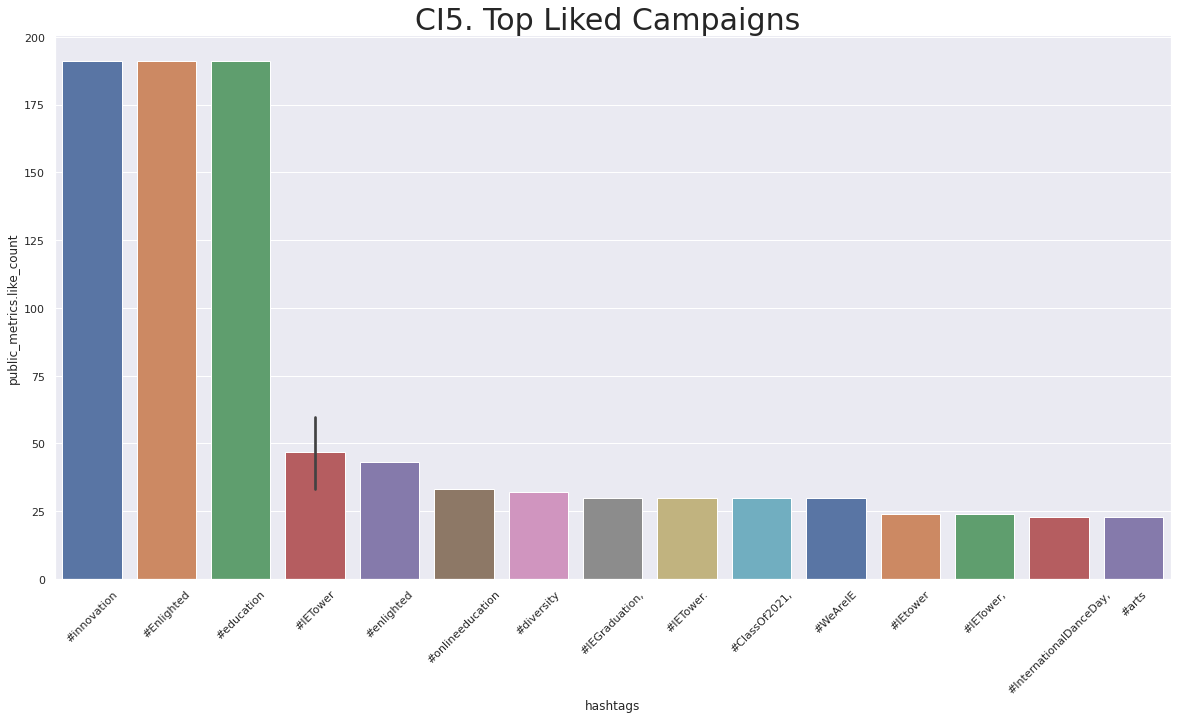

In [14]:
sns.color_palette("Paired")
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.barplot(x="hashtags", y="public_metrics.like_count", data=CI5Visualization,palette="deep").set_title("CI5. Top Liked Campaigns ",fontsize=30);
plt.xticks(rotation=45);

In [15]:
CI6Visualization=TopNHashTagsIEUniversity[['public_metrics.reply_count','hashtags']].sort_values(by='public_metrics.reply_count',ascending=False).head(20)

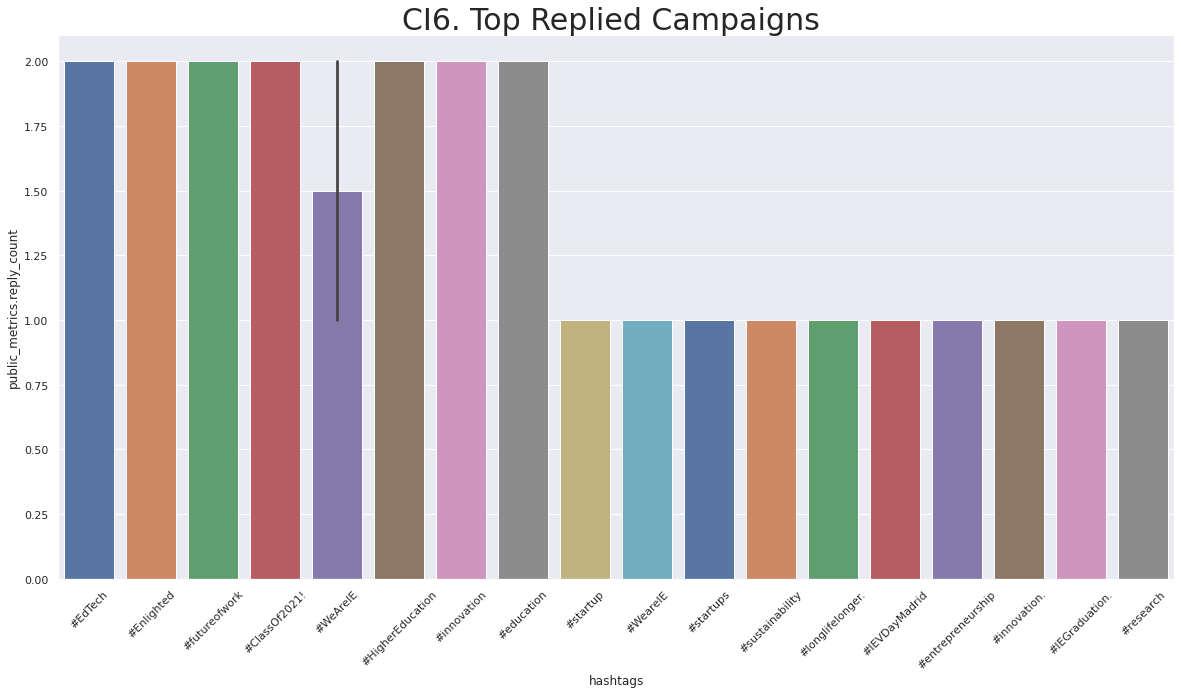

In [16]:
sns.color_palette("Paired")
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.barplot(x="hashtags", y="public_metrics.reply_count", data=CI6Visualization,palette="deep").set_title("CI6. Top Replied Campaigns ",fontsize=30);
plt.xticks(rotation=45);

### CMI7-9: Interests of people talking about your brand

### Nasty Hack: we need to filter based on a list of universitities. To do: include this annotation in Stage 1 and add a new column

### We consider only amplified conversations (0.7 Quantile)



In [17]:
ConversationsMentioningUniversities['refersTo']='FOO'

ConversationsMentioningUniversities.loc[ConversationsMentioningUniversities['text'].str.contains('@ucl'),'refersTo']='@ucl'

ConversationsMentioningUniversities.loc[ConversationsMentioningUniversities['text'].str.contains('@imperialcollege'),'refersTo']='@imperialcollege'

ConversationsMentioningUniversities.loc[ConversationsMentioningUniversities['text'].str.contains('@MIT'),'refersTo']='@MIT'

ConversationsMentioningUniversities.loc[ConversationsMentioningUniversities['text'].str.contains('@Stanford'),'refersTo']='@Stanford'

ConversationsMentioningUniversities.loc[ConversationsMentioningUniversities['text'].str.contains('@UniofOxford'),'refersTo']='@UniofOxford'

ConversationsMentioningUniversities.loc[ConversationsMentioningUniversities['text'].str.contains('@IEUniversity'),'refersTo']='@IEUniversity'


In [18]:
CMI78=ConversationsMentioningUniversities[(ConversationsMentioningUniversities['public_metrics.retweet_count']>ConversationsMentioningUniversities['public_metrics.retweet_count'].quantile(0.7))][['text','context_annotations']]

In [19]:
CMI78Exploded=CMI78['context_annotations'].explode()

In [20]:
CMI7Visualization=CMI78Exploded.apply(pd.Series)['domain'].apply(pd.Series).dropna(how='all')

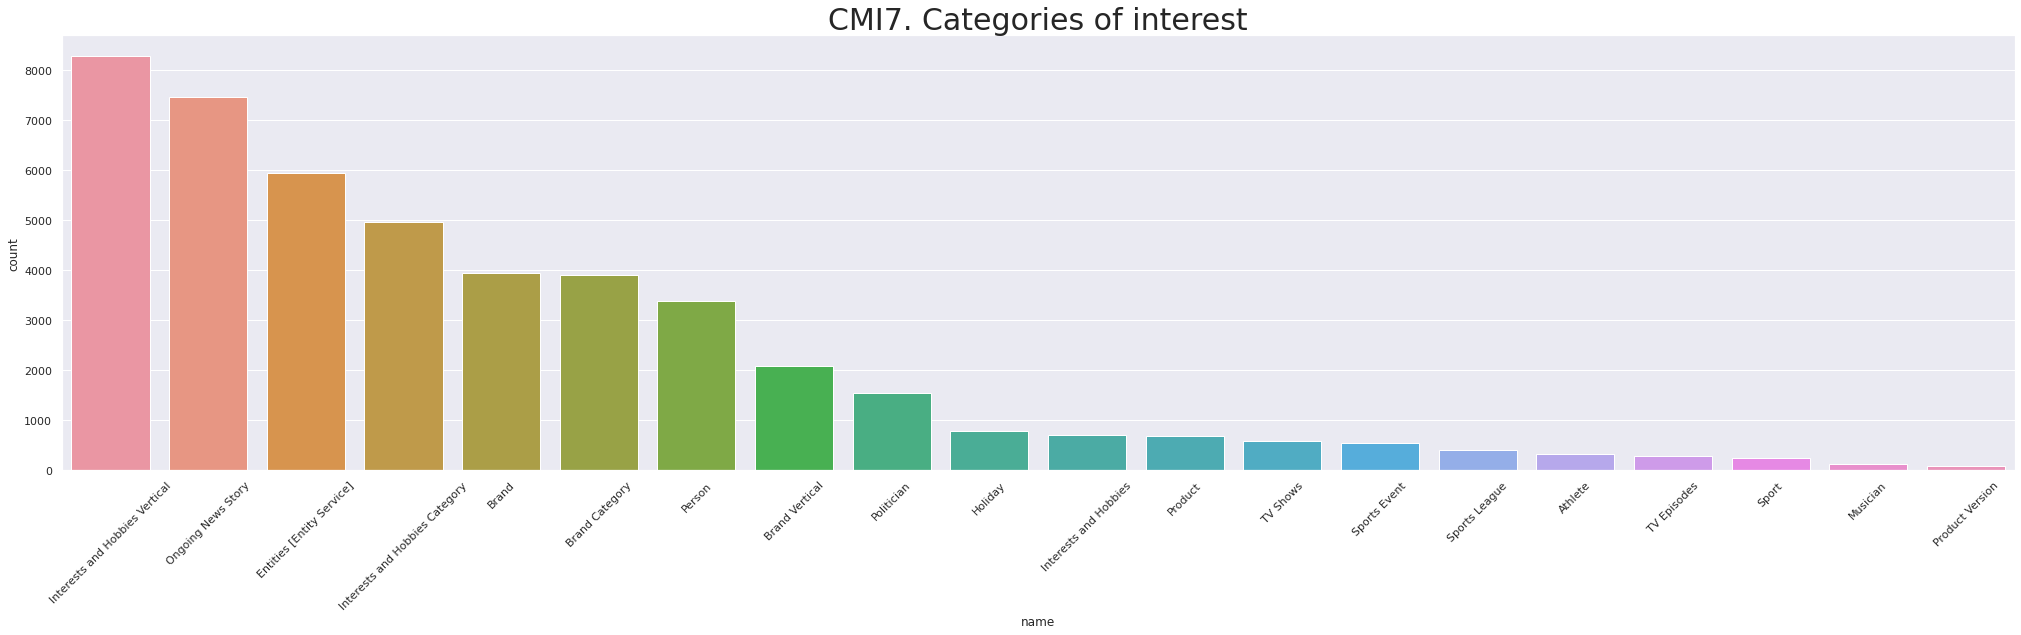

In [21]:
sns.set(rc={'figure.figsize':(35,8)})
sns.countplot(x="name", data=CMI7Visualization,order=pd.value_counts(CMI7Visualization['name']).iloc[:20].index).set_title("CMI7. Categories of interest",fontsize=30);
plt.xticks(rotation=45);

In [22]:
CMI8Visualization=CMI78Exploded.apply(pd.Series)['entity'].apply(pd.Series).dropna(how='all')

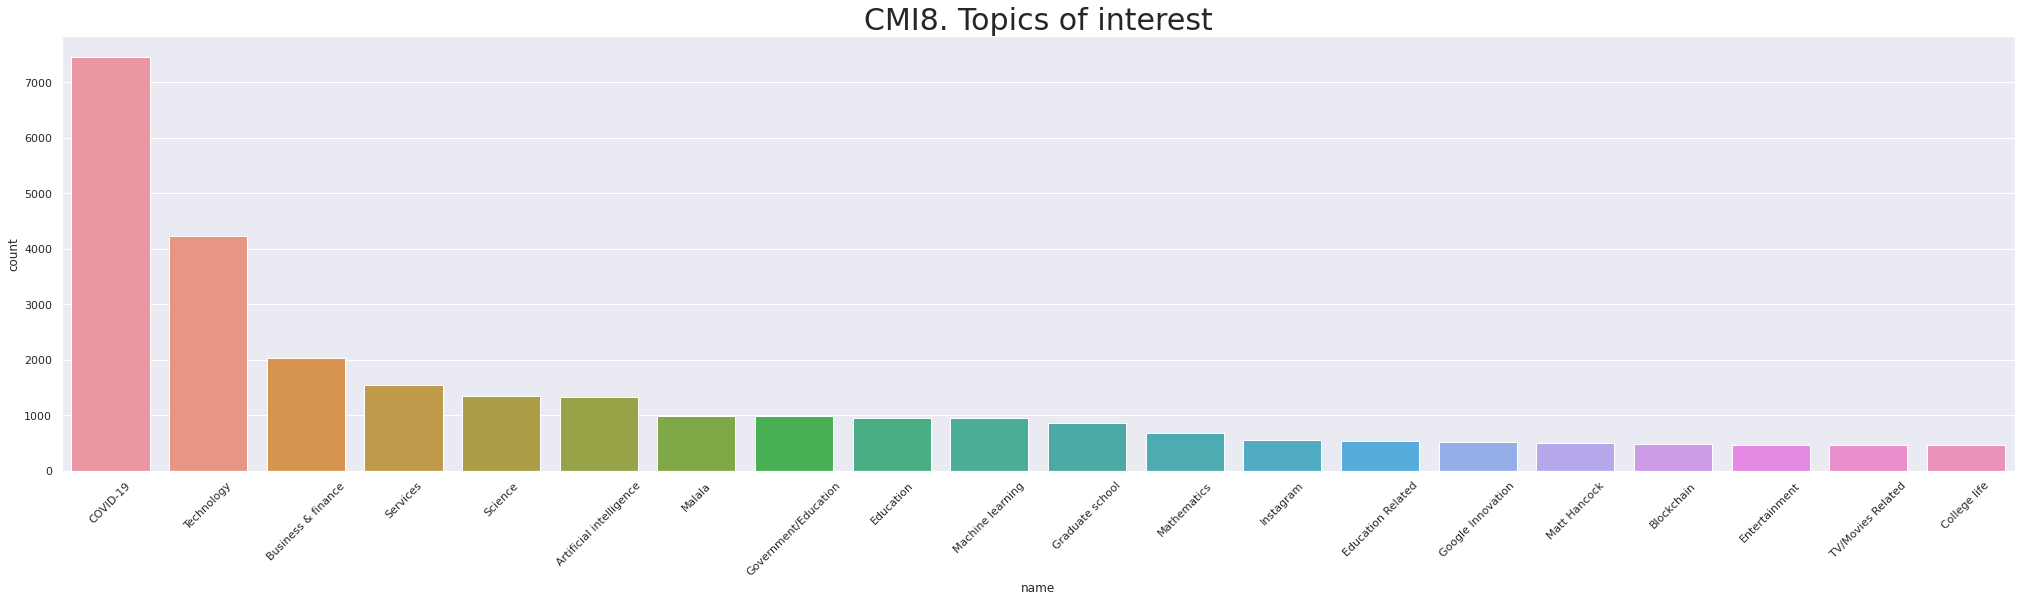

In [23]:
sns.set(rc={'figure.figsize':(35,8)})
sns.countplot(x="name", data=CMI8Visualization,order=pd.value_counts(CMI8Visualization['name']).iloc[:20].index).set_title("CMI8. Topics of interest",fontsize=30);
plt.xticks(rotation=45);

In [24]:
CMI9=ConversationsMentioningUniversities[(ConversationsMentioningUniversities['public_metrics.retweet_count']>ConversationsMentioningUniversities['public_metrics.retweet_count'].quantile(0.7))][['text','entities.hashtags']]

In [25]:
CMI9Exploded=CMI9['entities.hashtags'].explode()

In [26]:
CMI9Visualization=CMI9Exploded.apply(pd.Series)['tag'].dropna().to_frame()

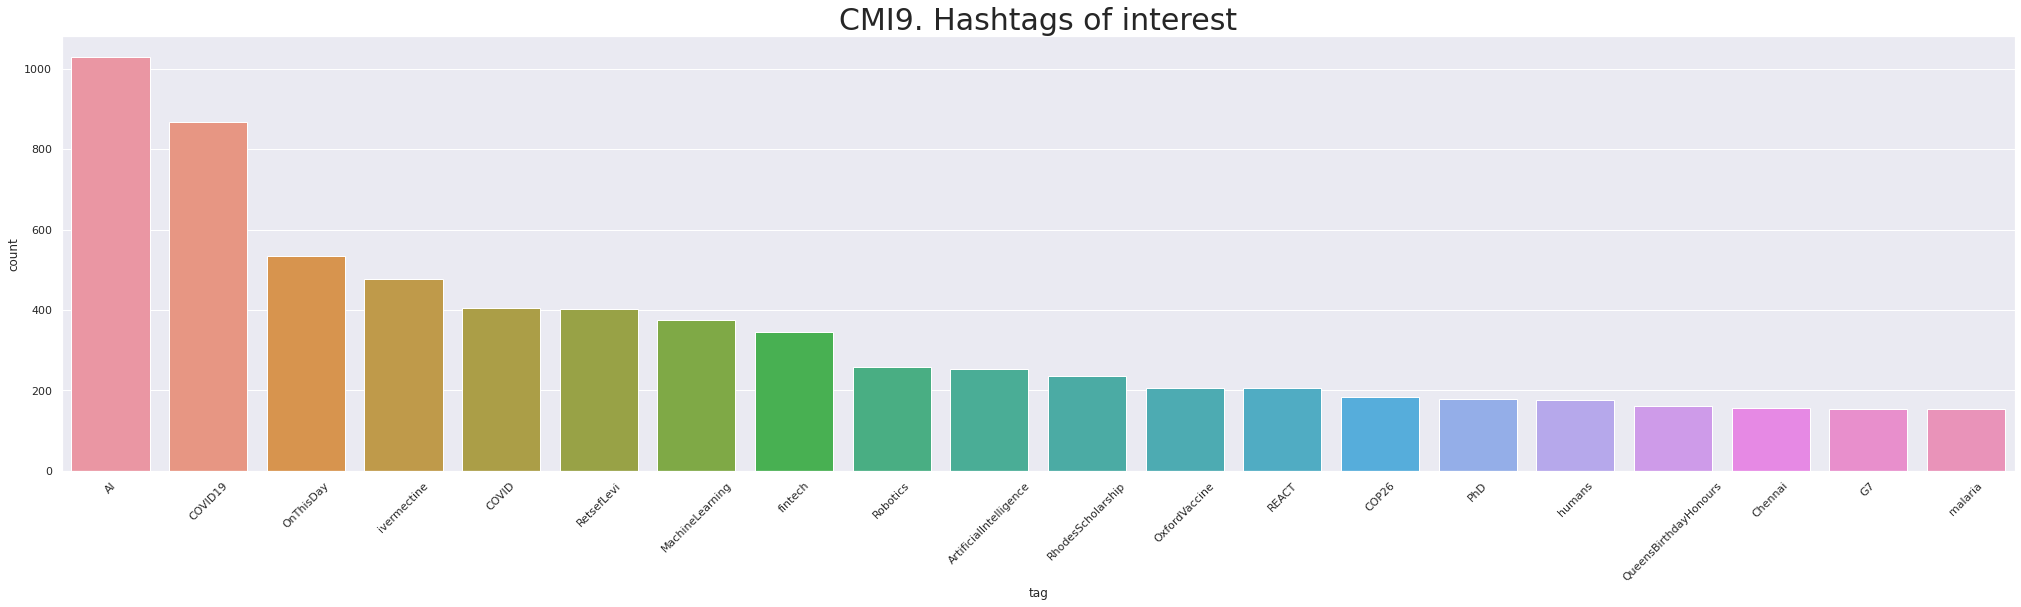

In [27]:
sns.set(rc={'figure.figsize':(35,8)})
sns.countplot(x="tag", data=CMI9Visualization,order=pd.value_counts(CMI9Visualization['tag']).iloc[:20].index).set_title("CMI9. Hashtags of interest",fontsize=30);
plt.xticks(rotation=45);

### CMI10-11: Location of people talking about your brand


In [28]:
CMI10=ConversationsMentioningUniversities[(ConversationsMentioningUniversities['public_metrics.retweet_count']>ConversationsMentioningUniversities['public_metrics.retweet_count'].quantile(0.7))]['author.location'].dropna()

In [29]:
CMI10Visualization=CMI10.to_frame()

In [30]:
CMI10Visualization=CMI10Visualization['author.location'].str.split(pat=",",expand=True)[[0,1]]

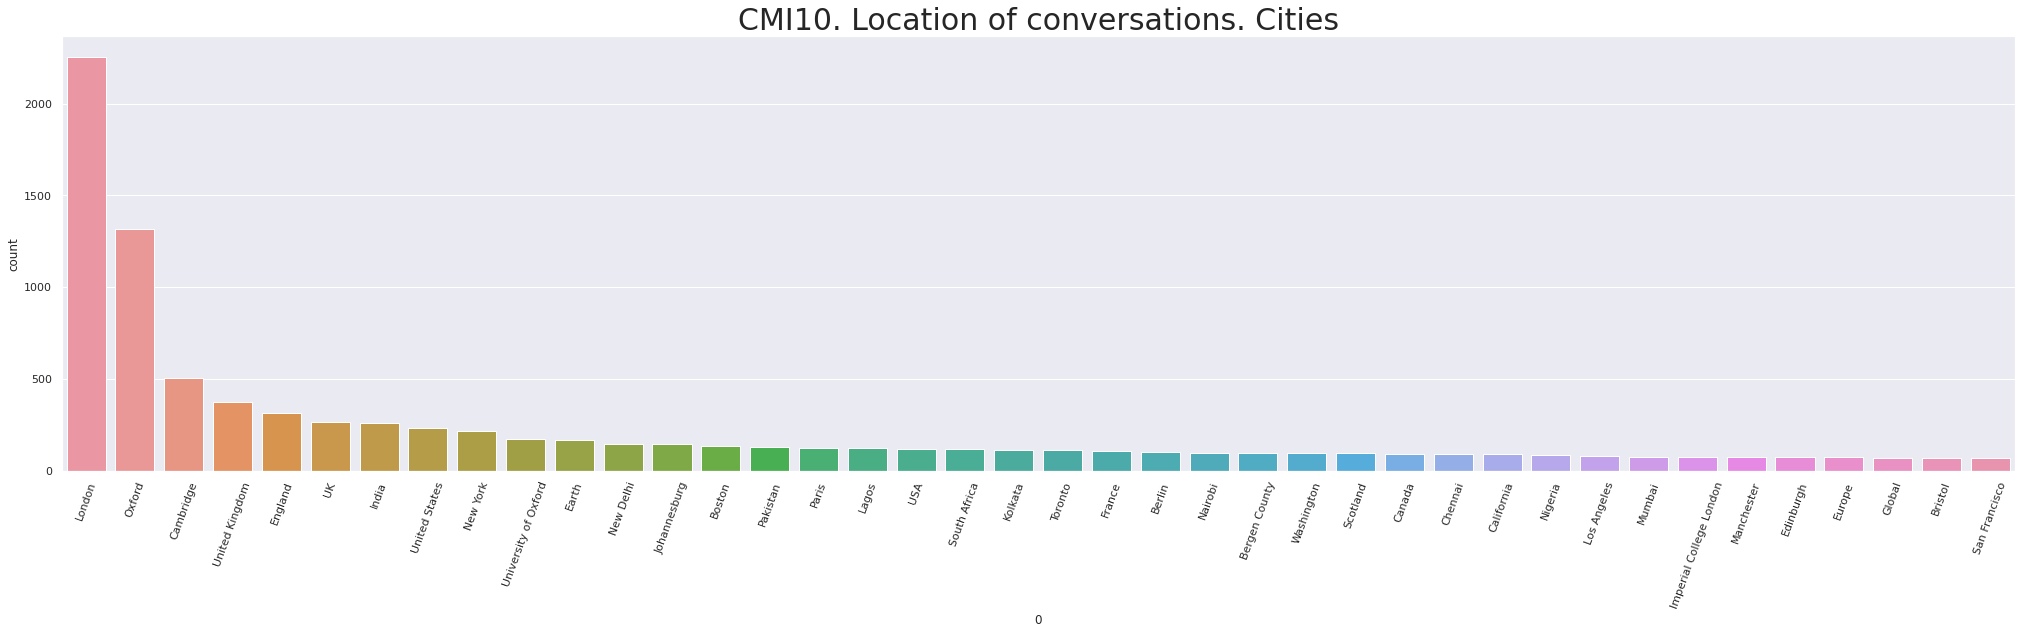

In [31]:
sns.set(rc={'figure.figsize':(35,8)})
sns.countplot(x=0, data=CMI10Visualization,order=pd.value_counts(CMI10Visualization[0]).iloc[:40].index).set_title("CMI10. Location of conversations. Cities",fontsize=30);
plt.xticks(rotation=70);

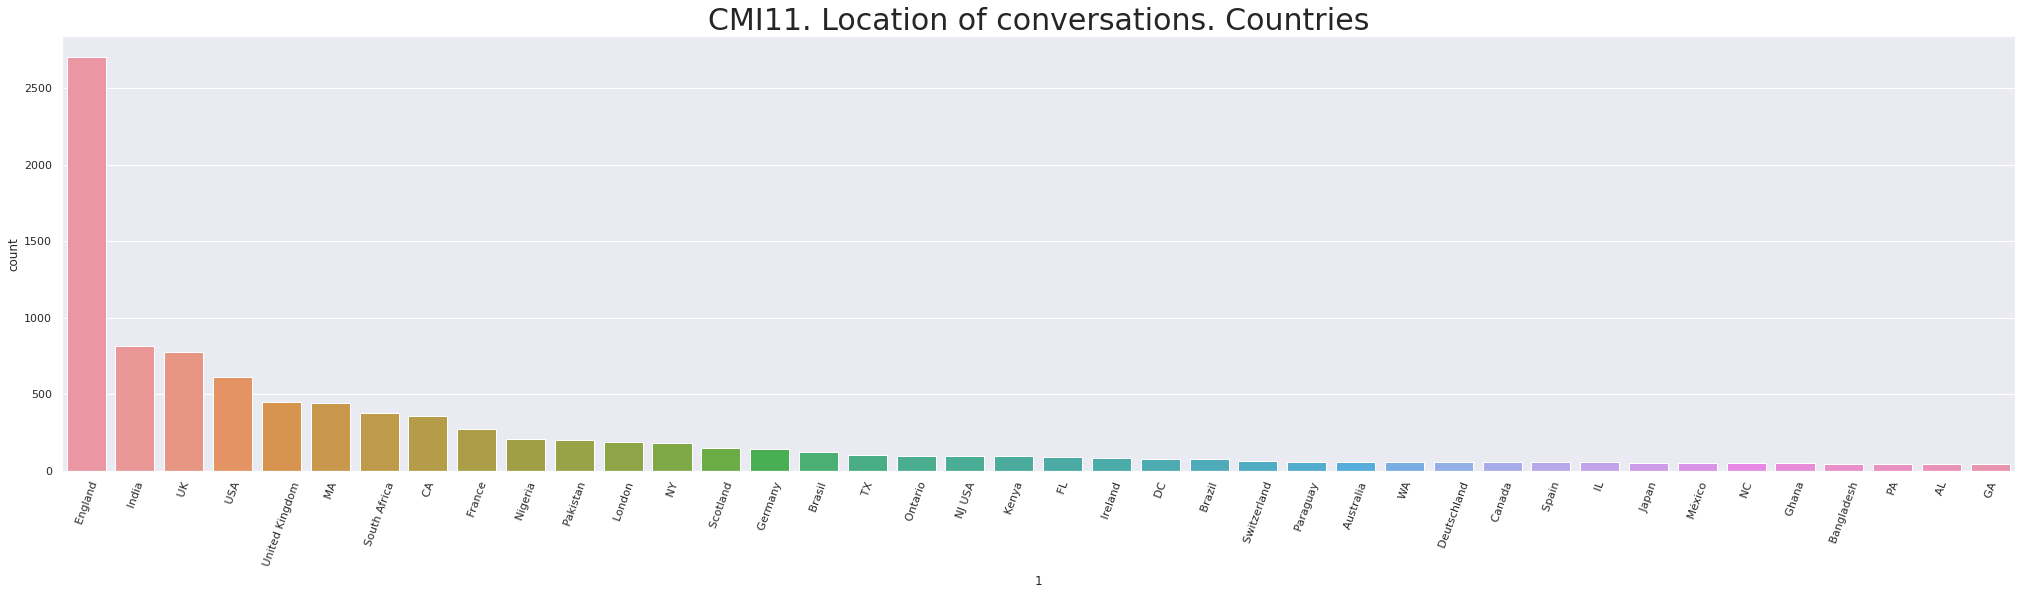

In [32]:
sns.set(rc={'figure.figsize':(35,8)})
sns.countplot(x=1, data=CMI10Visualization,order=pd.value_counts(CMI10Visualization[1]).iloc[:40].index).set_title("CMI11. Location of conversations. Countries",fontsize=30);
plt.xticks(rotation=70);